In [30]:
import sys
!{sys.executable} -m pip install seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

columns = ["Местное время в Перми", "T", "P", "U", "Ff", "N", "H", "VV"]
data = pd.read_csv("weather1.csv", sep=";", usecols=columns)
data.head()


,Местное время в Перми,T,P,U,Ff,N,H,VV
0,31.12.2021 23:00,-9.8,762.5,83,3,100%.,600-1000,4.0
1,31.12.2021 20:00,-10.6,764.2,81,3,100%.,1000-1500,4.0
2,31.12.2021 17:00,-11.6,765.5,79,2,"90 или более, но не 100%",1000-1500,10.0
3,31.12.2021 14:00,-11.9,766.7,77,1,100%.,1000-1500,20.0
4,31.12.2021 11:00,-13.6,767.5,79,1,100%.,1000-1500,10.0


Text(0, 0.5, 'влажность')

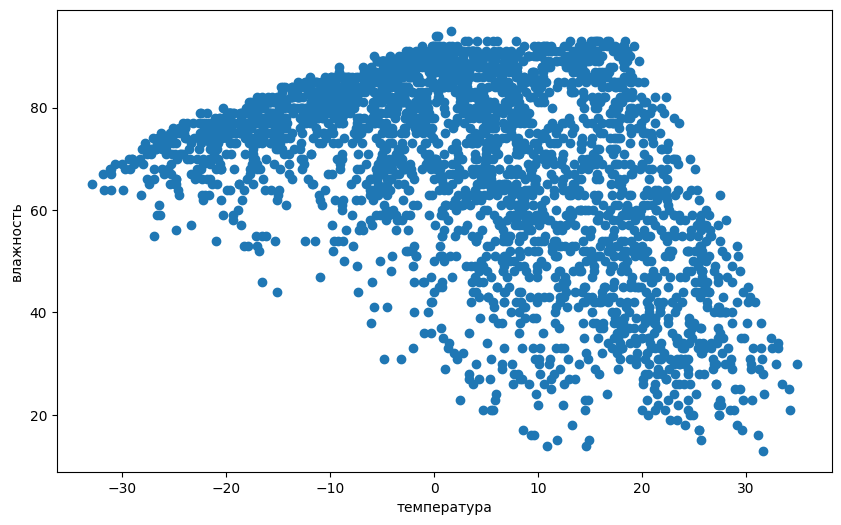

In [4]:
plt.figure(figsize=[10,6])
plt.scatter(data["T"], data["U"])
plt.xlabel("температура")
plt.ylabel("влажность")


Точек с облачностью 100%: 1427
Точек с другой облачностью: 1492


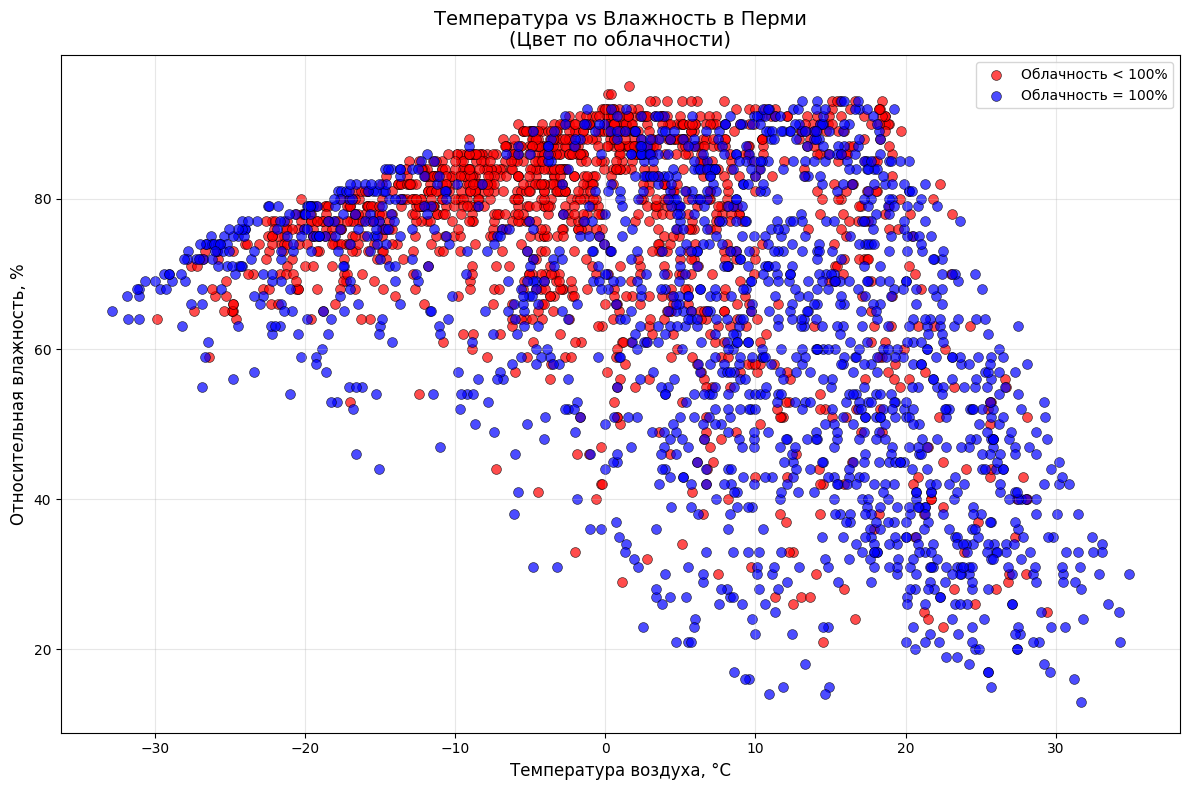

In [23]:
plt.figure(figsize=(12, 8))
cloud_100 = data[data["N"] == "100%."]
cloud = data[data["N"] != "100%."]

print(f"\nТочек с облачностью 100%: {len(cloud_100)}")
print(f"Точек с другой облачностью: {len(cloud)}")

plt.scatter(cloud_100["T"], cloud_100["U"],alpha=0.7, s=50, c='red', edgecolors='black', linewidth=0.5,
           label='Облачность < 100%')

plt.scatter(cloud["T"], cloud["U"],alpha=0.7, s=50, c='blue', edgecolors='black', linewidth=0.5,
           label='Облачность = 100%')
plt.xlabel('Температура воздуха, °C', fontsize=12)
plt.ylabel('Относительная влажность, %', fontsize=12)
plt.title('Температура vs Влажность в Перми\n(Цвет по облачности)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

<Axes: xlabel='month', ylabel='T'>

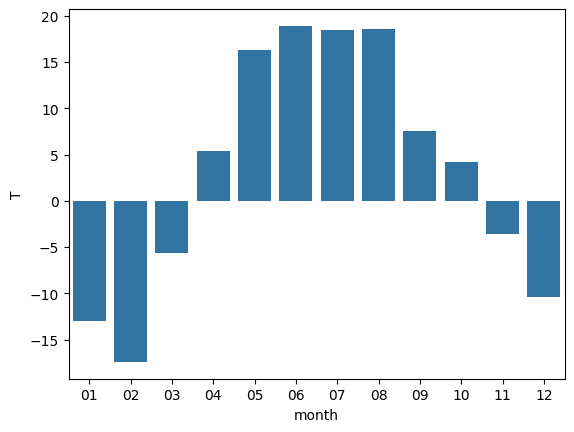

In [34]:
data["month"] = data["Местное время в Перми"].str.split(".").str[1]
grouped_by_month = data.groupby("month")["T"].mean().reset_index()
grouped_by_month
sns.barplot(x="month", y ="T", data=grouped_by_month)

<Axes: xlabel='count', ylabel='N'>

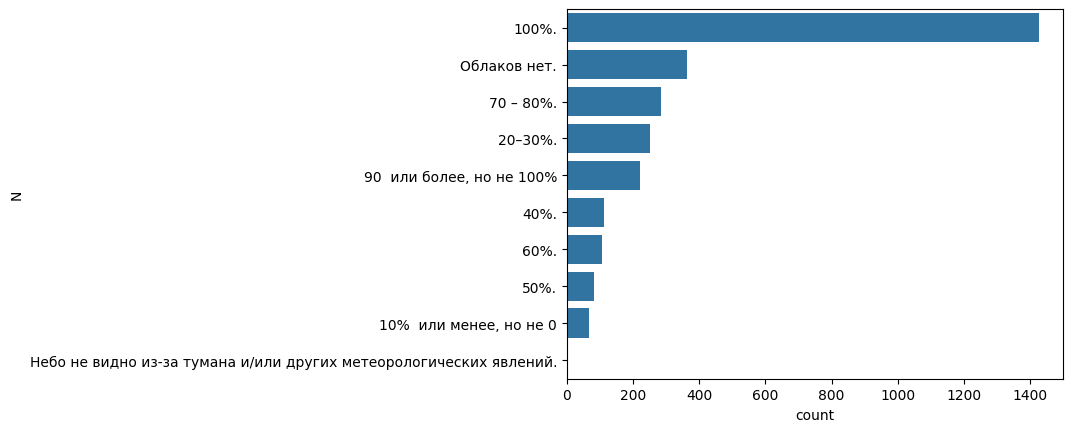

In [36]:
cloud_c = data["N"].value_counts().reset_index()
cloud_c.columns = ["N", "count"]

sns.barplot(y="N", x="count", data=cloud_c, orient="h")

<Axes: xlabel='T', ylabel='Count'>

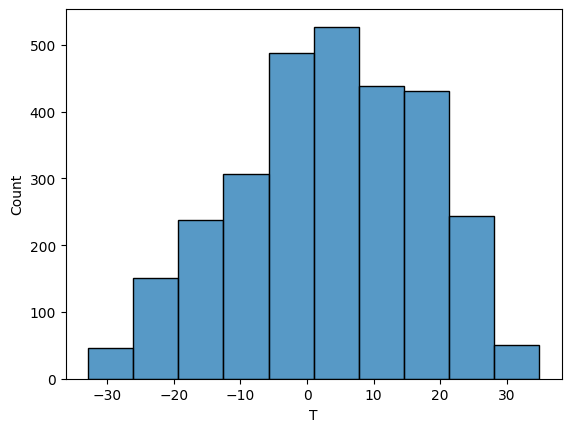

In [37]:
sns.histplot(data=data, x="T", bins=10, kde=False)

/var/folders/_4/q5bzk7rx44s7kbm8qbfh8yfh0000gn/T/ipykernel_67663/4222971172.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['VV_group'] = np.select(conditions, groups, default='unknown')


<Figure size 1200x800 with 0 Axes>

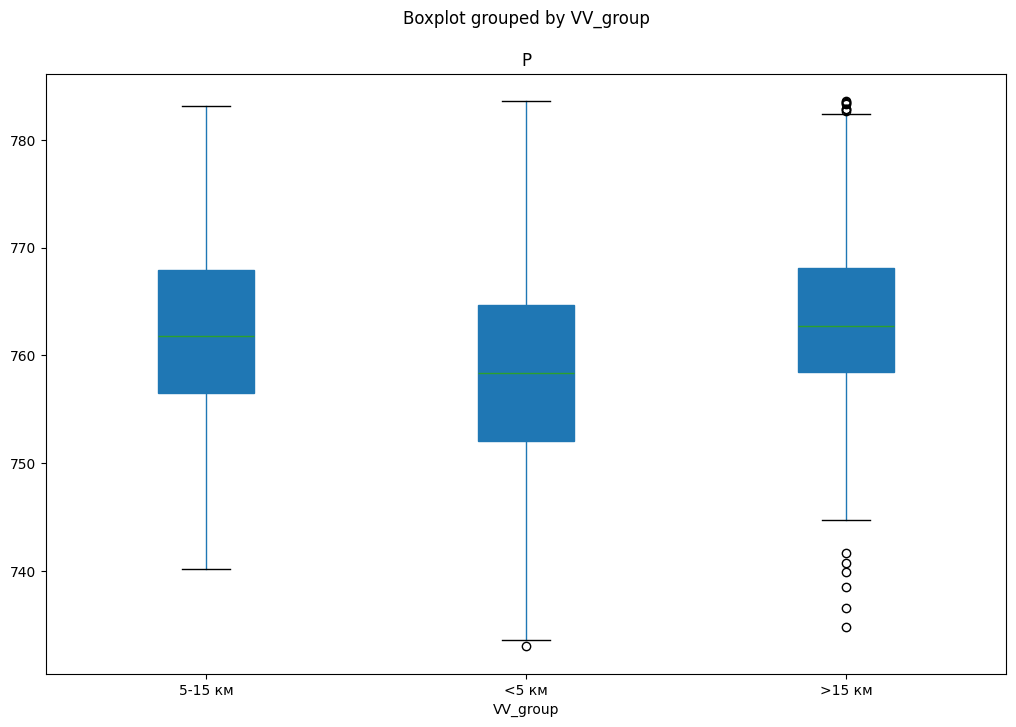

In [46]:
data_clean = data.dropna(subset=["VV"])
conditions = [
    (data_clean['VV'] < 5),
    (data_clean['VV'].between(5, 15, inclusive='both')),
    (data_clean['VV'] > 15)
]

groups = ['<5 км', '5-15 км', '>15 км']
data_clean['VV_group'] = np.select(conditions, groups, default='unknown')

plt.figure(figsize=(12, 8))
boxplot = data_clean.boxplot(column='P', by='VV_group', 
                              grid=False, 
                              figsize=(12, 8),
                              patch_artist=True) 

([<matplotlib.patches.Wedge at 0x176544550>,
 [Text(0.632566737475607, 0.8999218425171525, '600-1000'),
  Text(-0.9493372646758911, 0.5556606499453575, '1000-1500'),
  Text(-0.7650225969306099, -0.790405229098053, '2000-2500'),
  Text(0.3184621484703823, -1.0528921407207998, '2500 или более, или облаков нет.'),
  Text(0.9692137603063969, -0.5202160001698664, '300-600'),
  Text(1.096257622154599, -0.09065994632661521, '200-300'),
  Text(1.0998798809403825, -0.01625569139011151, '100-200')])

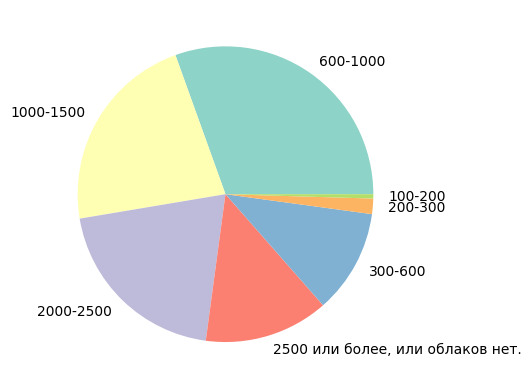

In [50]:
height = data["H"].value_counts()

plt.pie(height.values, 
        colors=plt.cm.Set3.colors,
       labels=height.index)